In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

In [3]:
lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

In [4]:
df_all = pd.concat(lista)

In [5]:
df_all.shape


(12670, 2)

In [6]:
df_all[df_all['Polaridade'] == -2]['Tweet'][488]
#df_all[df_all['Polaridade']

'Governo do #PSDB golpista &gt; Falta merenda - surrupiada - sobra polícia armada pra oprimir adolescentes que lutam por suas escolas públicas.\n'

In [7]:
# df_remove = df_all[df_all['Polaridade'] == -2]
# ultimo_df = df_all.drop(df_remove.index)
# df_remove = df_all[df_all['Polaridade'] == 11]
# ultimo_df = df_all.drop(df_remove.index)

In [8]:
df_all.isnull().sum()

Tweet         2
Polaridade    2
dtype: int64

In [9]:
df_all = df_all.dropna()

In [10]:
df_all.isnull().sum()

Tweet         0
Polaridade    0
dtype: int64

<AxesSubplot:xlabel='Polaridade', ylabel='count'>

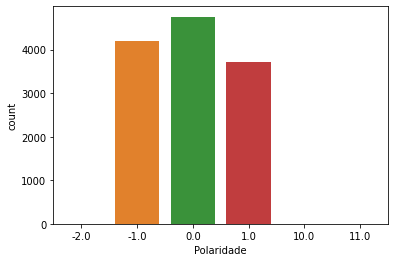

In [11]:
sns.countplot(data=df_all, x='Polaridade')

In [12]:
df_all = df_all.reset_index()

In [13]:
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [14]:
#df_all = df_all.drop(df_all[df_all['Polaridade'] == 0.0].index).reset_index()

In [15]:
df_all = df_all.drop(columns=['index'])

In [16]:
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)

In [17]:
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)

In [18]:
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

In [19]:
df_all

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...
12663,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [98]:
Tweet = df_all['Tweet']
polarity = df_all['Polaridade']

In [99]:
polarity = np.asarray(polarity)

In [100]:
polarity

array([0., 1., 1., ..., 1., 1., 1.])

In [24]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

In [25]:
tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF

In [26]:
X_train_transform.shape

(12665, 24464)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

In [28]:
clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes

In [29]:
predicted = clf.predict(X_test)

In [30]:
predicted

array([-1., -1., -1., ..., -1., -1.,  1.])

In [31]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.56      0.85      0.68      1278
         0.0       0.68      0.65      0.67      1380
         1.0       0.71      0.34      0.46      1142

    accuracy                           0.62      3800
   macro avg       0.65      0.61      0.60      3800
weighted avg       0.65      0.62      0.61      3800



In [46]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [33]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df['Tweet'])))
vocab = set_array(df_all['Tweet'])
vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())

15000

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3 , activation='softmax')
])

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [36]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [38]:
model.fit(X_train.todense(), y_one, epochs=5, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/5
278/278 [==============================] - 4s 16ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 1.6988 - val_accuracy: 0.6116
Epoch 2/5
278/278 [==============================] - 4s 16ms/step - loss: 0.0318 - accuracy: 0.9910 - val_loss: 1.7681 - val_accuracy: 0.6063
Epoch 3/5
278/278 [==============================] - 4s 15ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 1.8157 - val_accuracy: 0.6089
Epoch 4/5
278/278 [==============================] - 4s 15ms/step - loss: 0.0278 - accuracy: 0.9918 - val_loss: 1.8665 - val_accuracy: 0.6082
Epoch 5/5
278/278 [==============================] - 4s 15ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 1.9528 - val_accuracy: 0.6071


In [39]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 1s 4ms/step - loss: 1.9528 - accuracy: 0.6071


In [40]:
X_train.shape

(8865, 24464)

In [109]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(150, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(50 , activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet, polarity, test_size=0.3)

In [93]:
X_train

4607     #PSDB vai pedir inclusão de Lava Jato no proce...
6390     #PT #Brasil #Golpe Anatomia do golpe: as pegad...
9183     @ahh_amore Vale a pena #VerDeNovo  e REPASSAR ...
12447    Rede pede ao STF afastamento de Cunha da presi...
5588     @jeanwyllys_real neste mom. decisivo da histór...
                               ...                        
2908     ⚽⭐ #BRASILEIRÃO 2016 ● RESULTADOS ●4ª RODADA■ ...
4296     Photo Frames Mockup Free PSD file #freepsd #ps...
3891                   Controlador de jogo Vector Set - \n
5051     Mark Zuckerberg, proprietário do #Twitter, do ...
11929    @crvgnic #Martin é melhor que #PV, isso eu sei...
Name: Tweet, Length: 8865, dtype: object

In [43]:
model.fit(np.asarray(pre_X(X_train)), y_one, epochs=5, batch_size=64 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/5
139/139 [==============================] - 21s 149ms/step - loss: 1.0946 - accuracy: 0.3794 - val_loss: 1.0948 - val_accuracy: 0.3832
Epoch 2/5
139/139 [==============================] - 21s 151ms/step - loss: 1.1002 - accuracy: 0.3803 - val_loss: 1.0938 - val_accuracy: 0.3832
Epoch 3/5
139/139 [==============================] - 20s 143ms/step - loss: 1.0385 - accuracy: 0.4430 - val_loss: 1.1388 - val_accuracy: 0.3721
Epoch 4/5
139/139 [==============================] - 20s 147ms/step - loss: 0.9536 - accuracy: 0.5232 - val_loss: 1.3850 - val_accuracy: 0.3374
Epoch 5/5
139/139 [==============================] - 19s 139ms/step - loss: 0.8196 - accuracy: 0.5721 - val_loss: 1.4112 - val_accuracy: 0.3495


In [45]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 2s 20ms/step - loss: 1.4112 - accuracy: 0.3495


In [69]:
Tweet[0]

'- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti - Dir. do PGM - O Começo \n'

In [72]:
def set_array(frases):
    
    vocab = []
    
    for frase in frases:
        
        text_array = Tokenize(frase)
        vocab.extend(text_array)
    
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

In [78]:
Tweet_preprocessed = Tweet.apply(Tokenize)

In [85]:
Tweet_preprocessed[9]

'sabe loucuras vive aindasobrequinta vaisafadão expopretropolis2016 dem'

In [86]:
Tweet[9]

'"Não só sabe suas loucuras, mas vive elas com você ..." 🎼❤️ #aindasobrequinta #vaisafadão #expopretropolis2016 #dem… \n'

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [108]:
X_train.loc[8768]

'sen_cristovam lento distraído confuso multitarefa pior vetor vírus pt'

In [114]:
Tweet.loc[8768]

'O @Sen_Cristovam é lento, distraído, confuso. Não é multitarefa. Pior, é vetor do vírus #PT. \n'

In [110]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=5, batch_size=64 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/5
139/139 [==============================] - 18s 128ms/step - loss: 1.0942 - accuracy: 0.3795 - val_loss: 1.0966 - val_accuracy: 0.3734
Epoch 2/5
139/139 [==============================] - 17s 125ms/step - loss: 1.0820 - accuracy: 0.3929 - val_loss: 1.1037 - val_accuracy: 0.3600
Epoch 3/5
139/139 [==============================] - 17s 125ms/step - loss: 0.9820 - accuracy: 0.5020 - val_loss: 1.1787 - val_accuracy: 0.3508
Epoch 4/5
139/139 [==============================] - 17s 124ms/step - loss: 0.8447 - accuracy: 0.5913 - val_loss: 1.5117 - val_accuracy: 0.3353
Epoch 5/5
139/139 [==============================] - 17s 123ms/step - loss: 0.7259 - accuracy: 0.6691 - val_loss: 1.6555 - val_accuracy: 0.3350


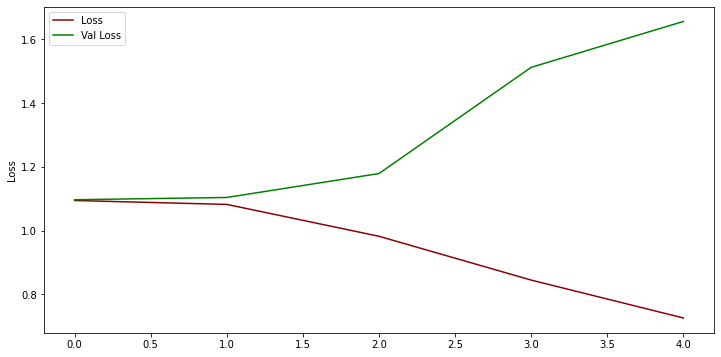

In [112]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

In [113]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 3s 22ms/step - loss: 1.6555 - accuracy: 0.3350
